<a href="https://colab.research.google.com/github/pizzapuppies/FYP_code/blob/main/raw_data%20with%20freq%2C%20CNN%2C%20dengue%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predictive ANN for solution


In [1]:
from google.colab import drive
import pandas as pd 
import os
import tensorflow as tf
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import random
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
mat = [[1,2,3],[4,5,6]]

def split23(li):
  g = []
  for i in range(1,len(li),3):
    g.append(li[i:i+3])
  return g

In [3]:
X = []

with open('/content/gdrive/My Drive/FYP Dengue data - Sheet1.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  line_count = 0
    
  for i in csv_reader:
    if line_count == 0:
      for j in range(len(split23(i))):
        X.append([])
      
    line_count += 1
    if i[0] in ["index","conc","label"]:
            if i[0] == "label":
              y = split23(i)
    else:
      li = split23(i)
      
      for ind,dat in enumerate(li):
        
        X[ind].append(list(map(float,dat)))




for i,li in enumerate(y):
  if li[0] == "1":
    y[i] = 1
  else:
    y[i] = 0

X = np.array(X)
y = np.array(y)

temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)
X = np.array(X)
y = np.array(y)



In [4]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X,y, test_size=0.10)

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
print(X_train[0])
print(Y_train[0])
print("\nTrain Test Dimensions:\n------------------------------------")
print("shape of training set",X_train.shape, Y_train.shape)
print("shape of testing set",X_test.shape, Y_test.shape)

[[9.99985e+04 5.06636e+02 2.21079e+01]
 [7.43713e+04 5.08014e+02 1.69617e+01]
 [5.53102e+04 5.09514e+02 1.31444e+01]
 [4.11358e+04 5.14301e+02 1.65171e+01]
 [3.05939e+04 5.13508e+02 1.24367e+01]
 [2.27528e+04 5.13206e+02 9.48025e+00]
 [1.69220e+04 5.13162e+02 7.69395e+00]
 [1.25849e+04 5.13186e+02 6.52205e+00]
 [9.35960e+03 5.12881e+02 5.87687e+00]
 [6.96087e+03 5.13169e+02 5.50921e+00]
 [5.17690e+03 5.13856e+02 5.67559e+00]
 [3.85010e+03 5.14151e+02 6.07369e+00]
 [2.86341e+03 5.14556e+02 6.78119e+00]
 [2.12955e+03 5.15082e+02 7.97566e+00]
 [1.58381e+03 5.15775e+02 9.58158e+00]
 [1.17791e+03 5.16622e+02 1.17172e+01]
 [8.76024e+02 5.17737e+02 1.44578e+01]
 [6.51509e+02 5.19050e+02 1.79079e+01]
 [4.84549e+02 5.20705e+02 2.22102e+01]
 [3.60370e+02 5.22647e+02 2.77437e+01]
 [2.68005e+02 5.24733e+02 3.47463e+01]
 [1.99318e+02 5.26972e+02 4.39282e+01]
 [1.48237e+02 5.29652e+02 5.59802e+01]
 [1.10250e+02 5.32562e+02 7.21108e+01]
 [8.19936e+01 5.36386e+02 9.35259e+01]
 [6.09793e+01 5.41947e+02

In [5]:
from tensorflow import keras



In [6]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

In [7]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(50,3), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(tf.keras.layers.Conv1D(
    2,3,activation='relu'
))
model.add(tf.keras.layers.Flatten())

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))



#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-4',
                              activation='relu'))




In [8]:
model.add(keras.layers.Dense(1,
                             name='Output-Layer',
                             activation='sigmoid'))

#model.summary()

In [9]:
#Compile the model with loss & metrics
model.compile(loss= tf.keras.losses.BinaryCrossentropy() ,
              metrics=['accuracy'])

In [10]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=10
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/20
10/10 [==============================] - 2s 56ms/step - loss: 92.3616 - accuracy: 0.7800 - val_loss: 5.1533e-10 - val_accuracy: 1.0000
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 2.8228e-04 - accuracy: 1.0000 - val_loss: 3.7895e-10 - val_accuracy: 1.0000
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 8.3995e-05 - accuracy: 1.0000 - val_loss: 3.0532e-10 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 0s 12ms/step - loss: 3.2042e-05 - accuracy: 1.0000 - val_loss: 2.5283e-10 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 1.6789e-05 - accuracy: 1.0000 - val_loss: 2.1487e-10 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 1.0073e-05 - accuracy: 1.0000 - val_loss: 1.7956e-10 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s

In [11]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 19ms/step - loss: 2.8936e-12 - accuracy: 1.0000


[2.89357448592098e-12, 1.0]


Accuracy during Training :
------------------------------------


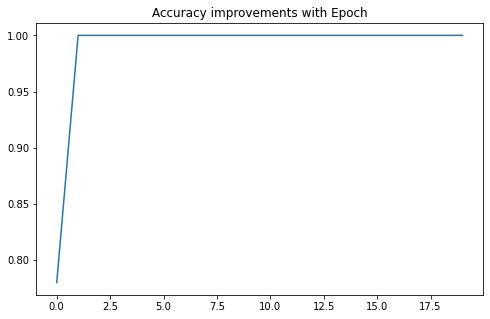

In [12]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()